# Goal of this notebook is to create a flow for a data scientist to be able to
- [x] Create a wallet, see balances
- [x] Get tokens from faucet using links (Looks like the faucets discourage automated methods)
- [ ] Search for a dataset on Ocean
- [ ] Download the dataset


Original Notebook found here: https://github.com/AlgoveraAI/generative-art/blob/main/notebooks/1-cryptopunks-dataset.ipynb
<br>IPFS Code is found here: https://docs.ipfs.io/how-to/command-line-quick-start/#take-your-node-online


In [1]:
import _init_paths

In [2]:
from IPython.display import Image 

# Create IPFS Node

In [43]:
!curl -O https://dist.ipfs.io/go-ipfs/v0.11.0/go-ipfs_v0.11.0_darwin-amd64.tar.gz
!tar -xvzf go-ipfs_v0.11.0_darwin-amd64.tar.gz
!cd go-ipfs
!bash go-ipfs/install.sh
!ipfs --version
!ipfs init
!ipfs cat /ipfs/QmQPeNsJPyVWPFDVHb77w8G42Fvo15z4bG2X8D2GhfbSXc/readme

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.1M  100 23.1M    0     0  18.5M      0  0:00:01  0:00:01 --:--:-- 18.5M
x go-ipfs/
x go-ipfs/ipfs
x go-ipfs/install.sh
Moved go-ipfs/ipfs to /usr/local/bin
ipfs version 0.11.0
generating ED25519 keypair...done
peer identity: 12D3KooWGP2S8g9hNgmUr5uvmt7yeQhPq7dX1Fgk24rd5S3FHvYx
initializing IPFS node at /Users/adamgoldstein/.ipfs
Error: ipfs configuration file already exists!
Reinitializing would overwrite your keys.

Hello and Welcome to IPFS!

██╗██████╗ ███████╗███████╗
██║██╔══██╗██╔════╝██╔════╝
██║██████╔╝█████╗  ███████╗
██║██╔═══╝ ██╔══╝  ╚════██║
██║██║     ██║     ███████║
╚═╝╚═╝     ╚═╝     ╚══════╝

If you're seeing this, you have successfully installed
IPFS and are now interfacing with the ipfs merkledag!

 -------------------------------------------------------
| Warning:                                        

# Starting the IPFS Node
* Create Terminal Window 
* Navigate to File -> New -> Terminal 
* run ipfs daemon to start the IPFS node initialized above

In [99]:
import pandas as pd

#Revist the column names
df = pd.read_csv("output.csv",sep="/",header=None,names=["IP","IP_Address","Port","Protocol","Idk","ID"]).reset_index(drop=True)
df

,IP,IP_Address,Port,Protocol,Idk,ID
0,1.12.228.20,udp,37631,quic,p2p,12D3KooWBhx6efZ5stoRk8M5XcodykoWDsXGL5QXXCu3Df...
1,101.231.135.211,udp,2054,quic,p2p,12D3KooWJ5PMSyPofdoxUBMDhnao3Xjq1hTZQF52TC8qQf...
2,101.231.135.211,udp,2060,quic,p2p,12D3KooWRfk6GM1TfR8nYhsqtPS6H27h9zaagfzoWxxwPE...
3,101.231.135.211,udp,2062,quic,p2p,12D3KooWM1LGh5ZSoremtktzeNLU5Gk74aGuw8DEuLuufm...
4,103.1.33.178,udp,2242,quic,p2p,12D3KooWDUokwvhct4stH18aDaSLxNZGZZbKyWjkgHRPPe...
...,...,...,...,...,...,...
848,96.22.128.189,udp,45899,quic,p2p,12D3KooWF8FhdXMVCdT6YsmByztWJHhdFCyBnfGp9gRNBc...
849,96.47.232.122,udp,4001,quic,p2p,12D3KooWDb6N99YG69Adpncs8pneZvtNBUKFQT9bhcDHpS...
850,98.223.60.115,udp,4001,quic,p2p,12D3KooWC5HAB1DE6H9qiCS3czJXC81Z3yjmr4VCGiTxdG...
851,99.234.105.252,udp,4001,quic,p2p,12D3KooWE5AesHDV7oKpqpZo6w2XwdPVL4FVPz8SUmcd8o...


In [89]:
#Your IP Address
!ipconfig getifaddr en0

192.168.1.216


In [100]:
# I thought I would be able to find my IP address?
df.query('ID == "12D3KooWRcLVQxsck4WxqafFV52Rhm5VSNjD9kNfs6c3rPpVC7h4"')

,IP,IP_Address,Port,Protocol,Idk,ID


# Grab File From IPFS

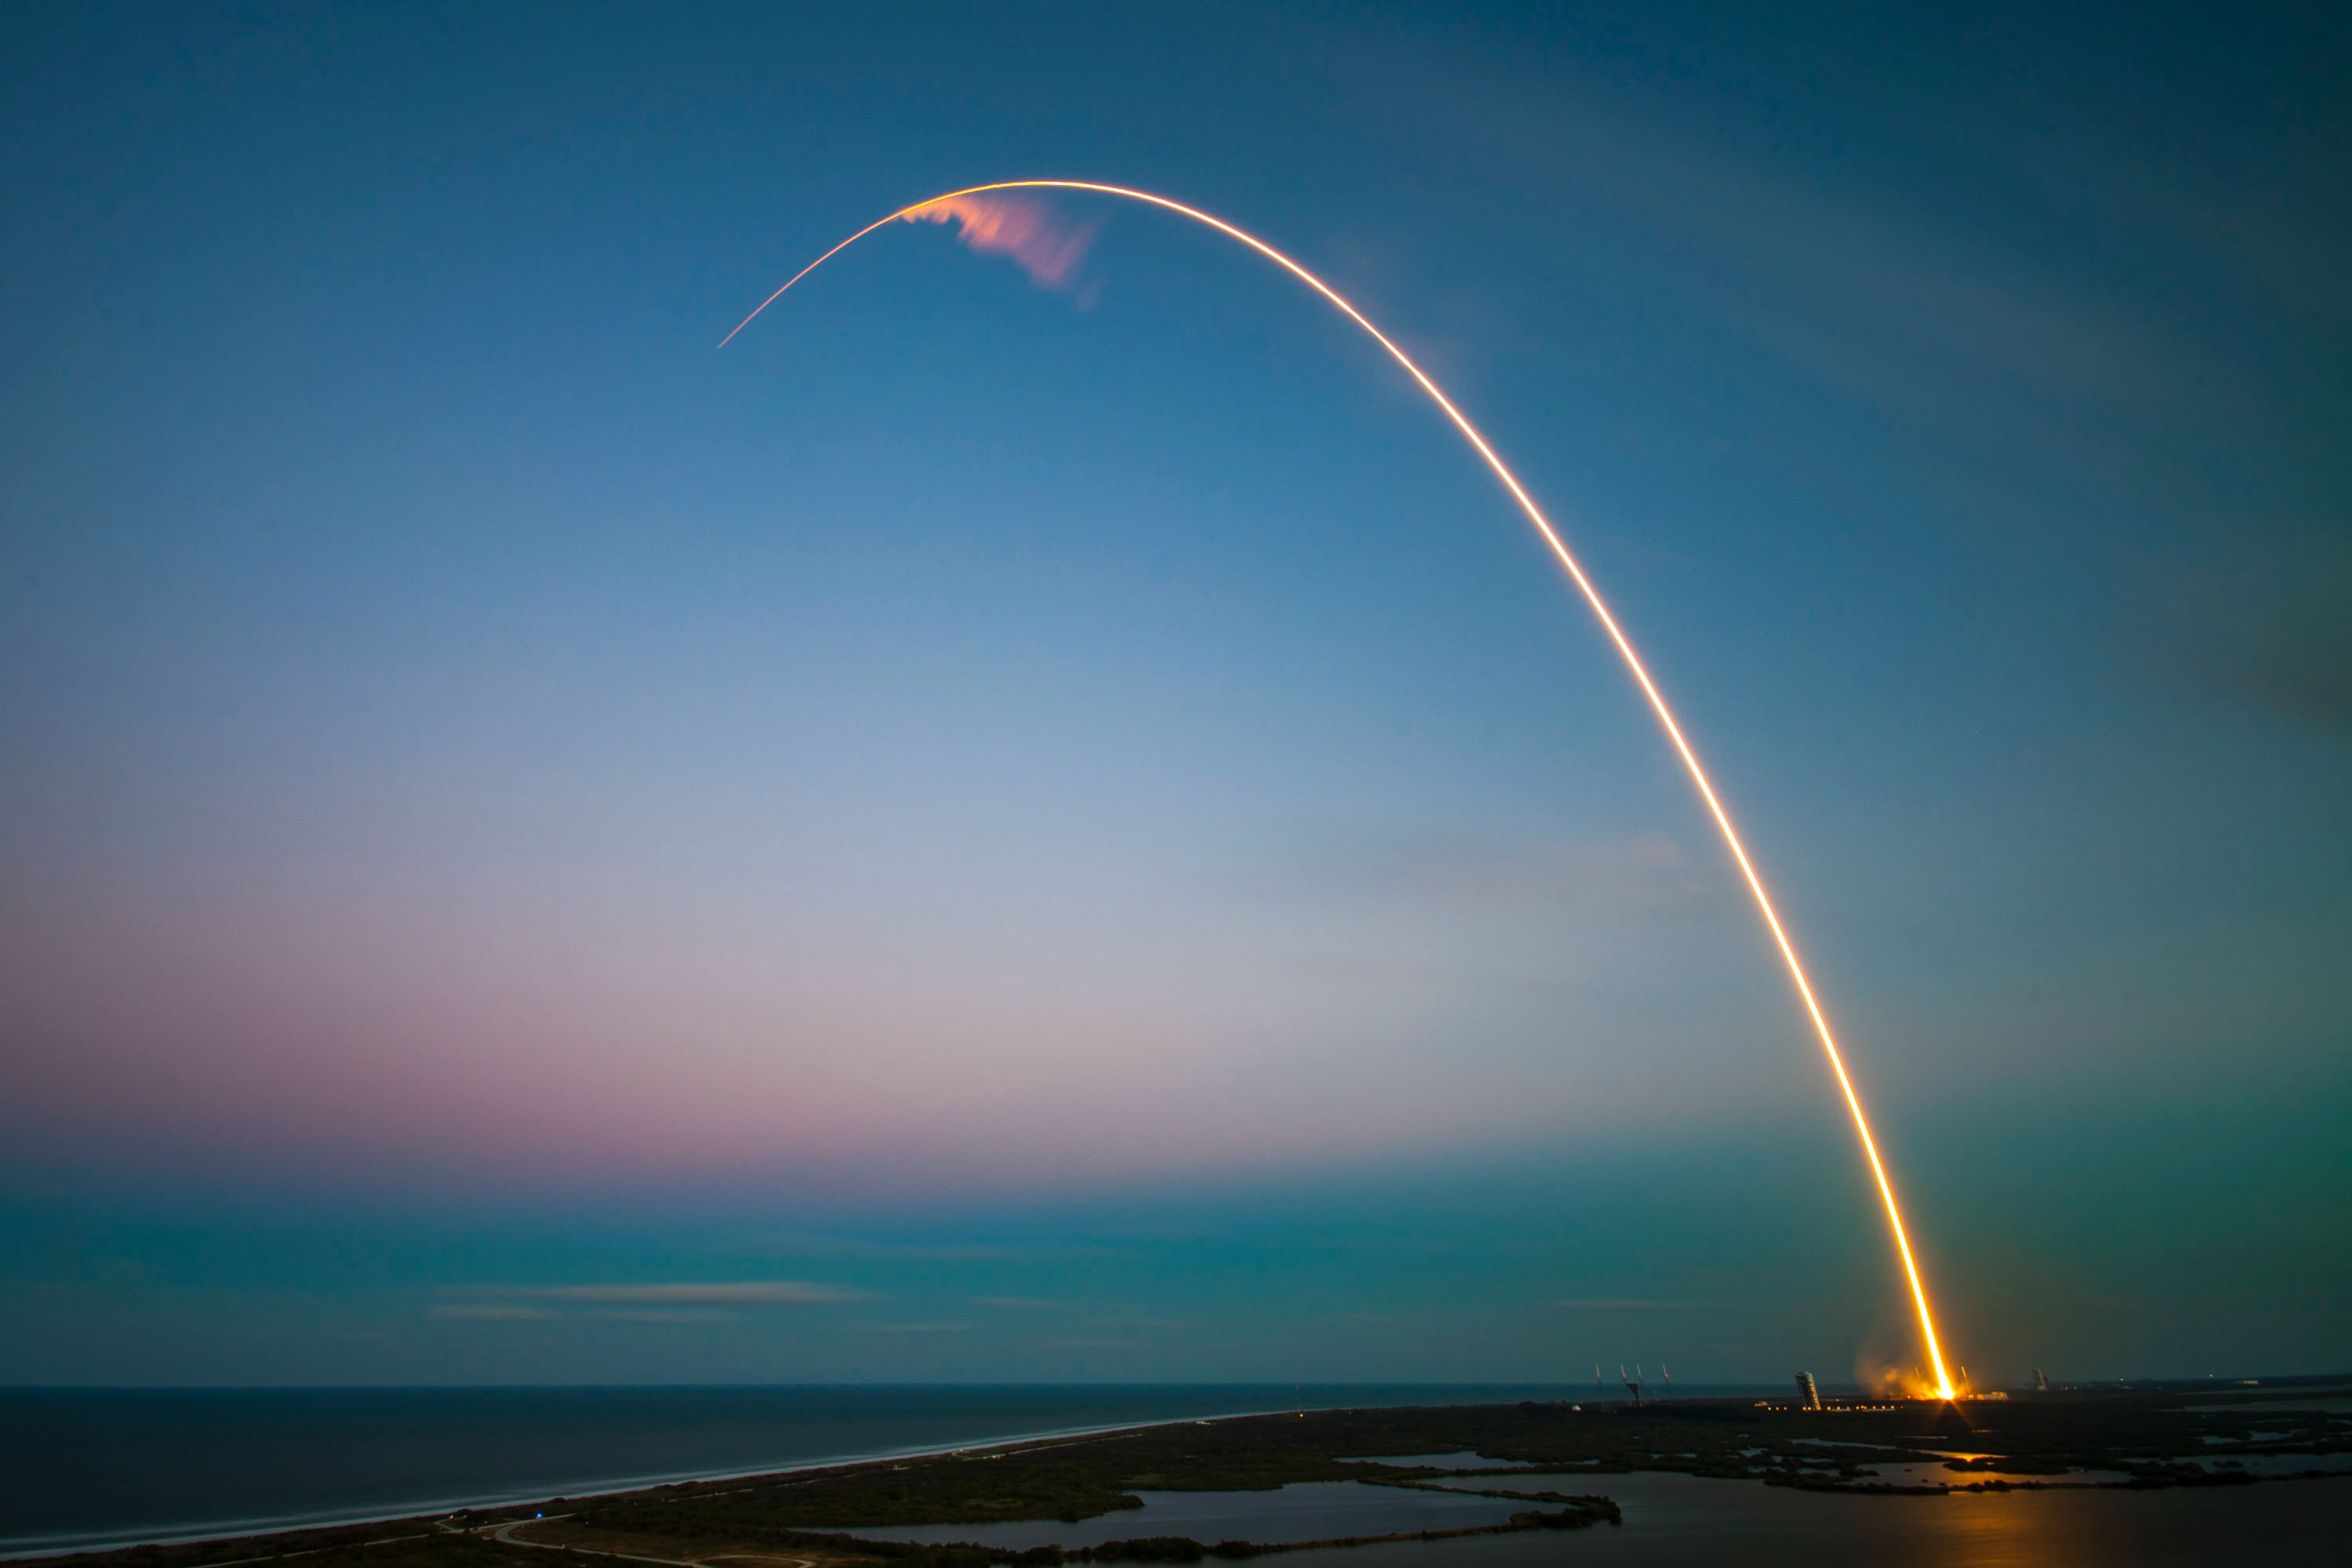

In [91]:
!ipfs swarm peers > output.csv
!ipfs cat /ipfs/QmSgvgwxZGaBLqkGyWemEDqikCqU52XxsYLKtdy3vGZ8uq > spaceship-launch.jpg

display(Image(filename='spaceship-launch.jpg', width = 400))

# Used https://flyingzumwalt.gitbooks.io/decentralized-web-primer/content/files-on-ipfs/lessons/add-and-retrieve-file-content.html

# Add and retrieve file from IPFS

In [239]:
#https://www.quora.com/How-do-I-create-a-random-file-of-1GB-of-size?share=1
# write a GB file
import numpy as np 
with open("demo.dat", "wb") as o: 
    o.write(np.random.bytes(1000000000))

In [240]:
# Add file to IPFS
!time ipfs add demo.dat
!time ipfs add output.csv

 953.67 MiB / 953.67 MiB [=============================================] 100.00%ipfs add demo.dat > demodat.txt  1.14s user 1.36s system 2% cpu 1:54.44 total
Error: lstat output.txt: no such file or directory

USAGE
  ipfs add <path>... - Add a file or directory to IPFS.

  ipfs add [--recursive | -r] [--dereference-args] [--stdin-name=<stdin-name>]
           [--hidden | -H] [--ignore=<ignore>]...
           [--ignore-rules-path=<ignore-rules-path>] [--quiet | -q]
           [--quieter | -Q] [--silent] [--progress | -p] [--trickle | -t]
           [--only-hash | -n] [--wrap-with-directory | -w]
           [--chunker=<chunker> | -s] [--pin=false] [--raw-leaves] [--nocopy]
           [--fscache] [--cid-version=<cid-version>] [--hash=<hash>] [--inline]
           [--inline-limit=<inline-limit>] [--] <path>...

  Adds the content of <path> to IPFS. Use -r to add directories (recursively).

  For more information about each command, use:
  'ipfs add <subcmd> --help'

ipfs add output.csv ou

In [237]:
!ipfs add demo.dat

added QmUufVMMnHaTmh9Zm73GXrFFwNTQzCx4MnyDEh9tBRQwab demo.dat==========] 100.00%
 953.67 MiB / 953.67 MiB [=============================================] 100.00%

In [238]:
# Retrieve File From 
!time ipfs cat QmabSpgosoiVbtdfw2gcUhp5RbwfNmBGXaGQyVQ4xMStnH >  d.dat

ipfs cat QmabSpgosoiVbtdfw2gcUhp5RbwfNmBGXaGQyVQ4xMStnH > d.dat  0.83s user 2.64s system 63% cpu 5.462 total


# Dat

In [241]:
!npm install -g @hyperspace/cli

npm WARN deprecated dat-encoding@5.0.2: Package no longer supported. Contact Support at https://www.npmjs.com/support for more info.
npm WARN deprecated debug@3.2.6: Debug versions >=3.2.0 <3.2.7 || >=4 <4.3.1 have a low-severity ReDos regression when used in a Node.js environment. It is recommended you upgrade to 3.2.7 or 4.3.1. (https://github.com/visionmedia/debug/issues/797)
npm WARN deprecated fsevents@2.1.3: "Please update to latest v2.3 or v2.2"Ksio
npm WARN deprecated cross-spawn-async@2.2.5: cross-spawn no longer requires a build toolchain, use it instead
npm WARN checkPermissions Missing write access to /usr/local/lib/node_modulesm
npm ERR! code EACCES
npm ERR! syscall access
npm ERR! path /usr/local/lib/node_modules
npm ERR! errno -13
npm ERR! Error: EACCES: permission denied, access '/usr/local/lib/node_modules'
npm ERR!  [Error: EACCES: permission denied, access '/usr/local/lib/node_modules'] {
npm ERR!   errno: -13,
npm ERR!   code: 'EACCES',
npm ERR!   syscall: 'access',

In [204]:
import web3
from eth_account import account

address = account.Account().create()

In [208]:
address.address, address.key

('0x3a0bAbA6991e192FcEB26866f45cE23752192A9c',
 HexBytes('0x7d03fed37e92162027e175fbef65fd3bdb092281c8ee7be93c15dadd28899676'))

# Step 2: Browse the Ocean Marketplace Using the Ocean Python Library
Now lets do the same through the Ocean Python library. We have installed the library for you in the JupyterHub instance. If you need to do this yourself in future, it's simple (you can view the readme [here](https://github.com/oceanprotocol/ocean.py)). 

We need to connect to the Ethereum network via an Ethereum node. We have set the config parameters for you in a config file. We are currently using [Infura](https://infura.io) for this but will be migrating to a full Ethereum Erigon node asap for increased decentralization. 

In [165]:
#This will eventually be a library

from ocean_lib.ocean.ocean import Ocean
from ocean_lib.config import Config
import ocean_lib as ocean
import numpy as np
import os
import requests

#https://github.com/oceanprotocol/ocean.py/blob/main/READMEs/get-test-OCEAN.md
from eth_account.account import Account
from ocean_lib.web3_internal.wallet import Wallet #might be redundant
from ocean_lib.models.data_token import DataToken



def config_ocean(config_f_path):

    config = Config(config_f_path)
    ocean = Ocean(config)

    print(f"config.network_url = '{config.network_url}'")
    print(f"config.metadata_cache_uri = '{config.metadata_cache_uri}'")
    print(f"config.provider_url = '{config.provider_url}'")
    
    return ocean,config

def create_wallet():
    
    account = Account.create()  #No metamask to create a wallet
    
    wallet = Wallet(ocean.web3, private_key=account.key.hex(),transaction_timeout=20, block_confirmations=config.block_confirmations)
    
    return wallet,wallet.key


# Need to have an address that is an approved minter - https://github.com/oceanprotocol/contracts/blob/main/contracts/dispenser/Dispenser.sol
# Code from - https://github.com/oceanprotocol/ocean.py/blob/main/ocean_lib/ocean/mint_fake_ocean.py
def request_ocean(deployer_wallet): 
    
    web3 = get_web3(config.network_url)

    OCEAN_token = DataToken(web3, address=network_addresses["development"]["Ocean"])

    amt_distribute = to_wei(1000)

    OCEAN_token.mint(
        deployer_wallet.address, 2 * amt_distribute, from_wallet=deployer_wallet
    )

    for key_label in ["TEST_PRIVATE_KEY1", "TEST_PRIVATE_KEY2"]:
        key = os.environ.get(key_label)
        if not key:
            continue

        w = Wallet(
            web3,
            private_key=key,
            block_confirmations=config.block_confirmations,
            transaction_timeout=config.transaction_timeout,
        )

        if OCEAN_token.balanceOf(w.address) < amt_distribute:
            OCEAN_token.transfer(w.address, amt_distribute, from_wallet=deployer_wallet)

        if get_ether_balance(web3, w.address) < to_wei(2):
            send_ether(deployer_wallet, w.address, to_wei(4))
            
    
    return wallet
    
    

ocean,config = config_ocean("../config.ini")
wallet,a_private = create_wallet()




print("Private K:",a_private)

config.network_url = 'https://rinkeby.infura.io/v3/d163c48816434b0bbb3ac3925d6c6c80'
config.metadata_cache_uri = 'https://aquarius.oceanprotocol.com'
config.provider_url = 'https://provider.rinkeby.oceanprotocol.com'
Private K: 0x76935c4bf3e39b2593252a8767fedb3e6d921a307d2c71c050fdeb2fec88b0c4


In [166]:
a_private

'0x76935c4bf3e39b2593252a8767fedb3e6d921a307d2c71c050fdeb2fec88b0c4'

Next, export your private key from your metamask wallet. We highly recommend doing this with a wallet that has no real tokens in it (only Rinkeby tokens). For more info on private keys, see [this](https://github.com/oceanprotocol/ocean.py/blob/main/READMEs/wallets.md) from the ocean.py documentation: 

*The whole point of crypto wallets is to store private keys. Wallets have various tradeoffs of cost, convienence, and security. For example, hardware wallets tend to be more secure but less convenient and not free. It can also be useful to store private keys locally on your machine, for testing, though only with a small amount of value at stake (keep the risk down). Do not store your private keys on anything public, unless you want your tokens to disappear. For example, don't store your private keys in GitHub or expose them on frontend webpage code.*

With this in mind, you can directly load your private key into the notebook. We use an envvar rather than storing it in code that might be pushed to a repo. We copy this in for a new session (you may need to restart the notebook server). Here's how we export an environmental variable using an example key (replace this with your actual private key.). From your console:

```console
export MY_TEST_KEY=0xaefd8bc8725c4b3d15fbe058d0f58f4d852e8caea2bf68e0f73acb1aeec19baa
```

Now initialize your wallet:

This should print out the public key of your metamask wallet. Check that it matches the one displayed in your metamask. Let's check the balances in our wallet. These should match the amount you received from the faucets (minus any you've since spent).

# Put money in wallet

In [195]:
assert 1 == 0

AssertionError: 

In [167]:
from ocean_lib.web3_internal.currency import from_wei # wei is the smallest denomination of ether e.g. like cents
from ocean_lib.models.btoken import BToken #BToken is ERC20
OCEAN_token = BToken(ocean.web3, ocean.OCEAN_address)

print(f"ETH balance = '{from_wei(ocean.web3.eth.get_balance(wallet.address))}'")
print(f"OCEAN balance = '{from_wei(OCEAN_token.balanceOf(wallet.address))}'")

assert from_wei(ocean.web3.eth.get_balance(wallet.address)) > 0 

ETH balance = '0E-18'
OCEAN balance = '0E-18'


AssertionError: 

In [10]:
from ocean_lib.ocean import mint_fake_ocean

In [12]:
help(mint_fake_ocean)

Help on module ocean_lib.ocean.mint_fake_ocean in ocean_lib.ocean:

NAME
    ocean_lib.ocean.mint_fake_ocean

DESCRIPTION
    # Copyright 2021 Ocean Protocol Foundation
    # SPDX-License-Identifier: Apache-2.0
    #

FUNCTIONS
    mint_fake_OCEAN(config: ocean_lib.config.Config) -> None
        Does the following:
        1. Mints tokens
        2. Distributes tokens to TEST_PRIVATE_KEY1 and TEST_PRIVATE_KEY2

FILE
    /Users/adamgoldstein/opt/anaconda3/lib/python3.8/site-packages/ocean_lib/ocean/mint_fake_ocean.py




In [25]:

print("Public Wallet",wallet.address,"in","https://faucet.rinkeby.oceanprotocol.com/","and","https://faucets.chain.link/rinkeby")

Public Wallet 0x34a6e7B1603d0666A56C25Def3b5B7d73EBa094c in https://faucet.rinkeby.oceanprotocol.com/ and https://faucets.chain.link/rinkeby


Now let's download a dataset. For the CryptoPunks Image dataset [here](https://market.oceanprotocol.com/asset/did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281), copy the decentralized identifier (DID).  

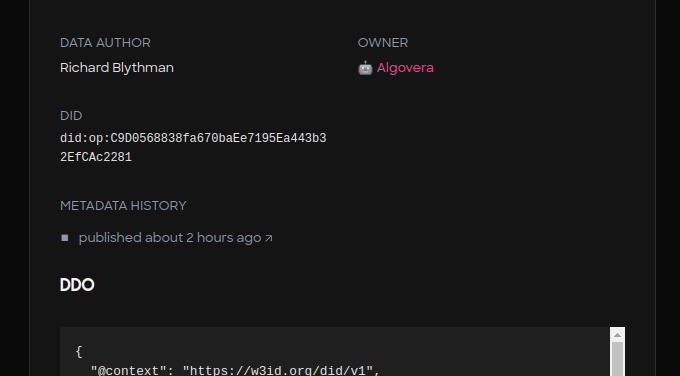

In [9]:
display(Image(filename='../images/did.png', width = 400))

In [191]:
!export FACTORY_DEPLOYER_PRIVATE_KEY=0xc594c6e5def4bab63ac29eed19a134c130388f74f019bc74b8f4389df2837a58

In [192]:
#create ocean instance
from ocean_lib.example_config import ExampleConfig
from ocean_lib.ocean.ocean import Ocean

import os
print(os.environ.get("FACTORY_DEPLOYER_PRIVATE_KEY"))
config = Config("../config.ini")
ocean = Ocean(config)

print(f"config.network_url = '{config.network_url}'")
print(f"config.block_confirmations = {config.block_confirmations.value}")
print(f"config.metadata_cache_uri = '{config.metadata_cache_uri}'")
print(f"config.provider_url = '{config.provider_url}'")

#Alice's wallet
import os
from ocean_lib.web3_internal.wallet import Wallet
alice_private_key = a_private
alice_wallet = Wallet(ocean.web3, alice_private_key, config.block_confirmations, config.transaction_timeout)
print(f"alice_wallet.address = '{alice_wallet.address}'")

#Mint OCEAN
from ocean_lib.ocean.mint_fake_ocean import mint_fake_OCEAN
mint_fake_OCEAN(config)

#Publish a datatoken
assert alice_wallet.web3.eth.get_balance(alice_wallet.address) > 0, "need ETH"
data_token = ocean.create_data_token('DataToken1', 'DT1', alice_wallet, blob=ocean.config.metadata_cache_uri)
token_address = data_token.address
print(f"token_address = '{token_address}'")

#Specify metadata and service attributes, using the Branin test dataset
date_created = "2019-12-28T10:55:11Z"
metadata =  {
    "main": {
        "type": "dataset", "name": "branin", "author": "Trent",
        "license": "CC0: Public Domain", "dateCreated": date_created,
        "files": [{"index": 0, "contentType": "text/text",
                   "url": "https://raw.githubusercontent.com/trentmc/branin/main/branin.arff"}]}
}
service_attributes = {
        "main": {
            "name": "dataAssetAccessServiceAgreement",
            "creator": alice_wallet.address,
            "timeout": 3600 * 24,
            "datePublished": date_created,
            "cost": 1.0, # <don't change, this is obsolete>
        }
    }

#Publish metadata and service attributes on-chain.
# The service urls will be encrypted before going on-chain.
# They're only decrypted for datatoken owners upon consume.
from ocean_lib.data_provider.data_service_provider import DataServiceProvider
from ocean_lib.common.agreements.service_types import ServiceTypes
from ocean_lib.services.service import Service

service_endpoint = DataServiceProvider.get_url(ocean.config)
download_service = Service(
    service_endpoint=service_endpoint,
    service_type=ServiceTypes.ASSET_ACCESS,
    attributes=service_attributes,
)
assert alice_wallet.web3.eth.get_balance(alice_wallet.address) > 0, "need ETH"
asset = ocean.assets.create(
  metadata,
  alice_wallet,
  services=[download_service],
  data_token_address=token_address)
assert token_address == asset.data_token_address

did = asset.did  # did contains the datatoken address
print(f"did = '{did}'")

None
config.network_url = 'https://rinkeby.infura.io/v3/d163c48816434b0bbb3ac3925d6c6c80'
config.block_confirmations = 0
config.metadata_cache_uri = 'https://aquarius.oceanprotocol.com'
config.provider_url = 'https://provider.rinkeby.oceanprotocol.com'
alice_wallet.address = '0xb3feBFe30c371F0c49A7d85C083EE33c4d7bC53d'


TypeError: Expected type '<class 'str'>' for attribute 'private_key' but received type '<class 'NoneType'>')

# Get Dataset - Stuck here with implementing the terminal commands of gdown and tarfile to python

In [11]:
from pathlib import Path
import gdown
import tarfile

def get_dataset(dataset_name,output_fn):
    
    #This would ideally be a drop down with the keys as the inputs
    ds = {"punks":"did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281",
     "VladData":"did:op:72419bf07C6181dAEdc068caB0d81faa2951910e",
     "AvgDenver":"did:op:81607300c6b50fbF0172E9A0038B6e898Fc15d82"
     }

    did = ds[dataset_name]
    asset = ocean.assets.resolve(did)

    sample_link = asset.metadata['additionalInformation']['links'][0]['url']#Needs to be generalized
    ID = Path(sample_link).parts[4]

    download_dir = Path('data')
    dataset_name = f"{dataset_name}-sample"
    download_path = str(download_dir / (dataset_name + '.tgz'))
    if not download_dir.exists():
        download_dir.mkdir(parents=False)
    


    #implementing gdown in python - stuck here
    
    gdown.download(sample_link, output_fn, quiet=False) # !gdown --id {ID} -O {download_path }
    
#     t = tarfile.open("/Users/adamgoldstein/Documents/Crypto/generative-art/data/cryptopunks-sample.tgz",mode="r:gz")
#     t.getnames() # !tar -xvzf {download_path} -C {str(download_dir)}

#     output = '20150428_collected_images.tgz'
    
    
    
get_dataset("punks","20150428_collected_images.tgz")

# get_dataset("VladData","20150428_collected_images.tgz")

# get_dataset("AvgDenver","20150428_collected_images.tgz")

/Users/adamgoldstein/opt/anaconda3/lib/python3.8/site-packages/gdown/parse_url.py:35: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW/view?usp=sharing
To: /Users/adamgoldstein/Documents/Crypto/generative-art/notebooks/20150428_collected_images.tgz
70.4kB [00:00, 25.8MB/s]


We can get the URL to the sample data from the associated metadata:

Download the data from the command line (TO DO: fix+streamline this. For now, the sample is downloaded manually in the JupyterHub instance):

* Previous Version

In [13]:
#This would ideally be a drop down with the keys as the inputs
ds = {"punks":"did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281",
 "VladData":"did:op:72419bf07C6181dAEdc068caB0d81faa2951910e",
 "AvgDenver":"did:op:81607300c6b50fbF0172E9A0038B6e898Fc15d82"
 }

did = ds["punks"]
asset = ocean.assets.resolve(did)

sample_link = asset.metadata['additionalInformation']['links'][0]['url']#Needs to be generalized
ID = Path(sample_link).parts[4]

download_dir = Path('data')
dataset_name = f"punks-sample"
download_path = str(download_dir / ("punks" + '.tgz'))
if not download_dir.exists():
    download_dir.mkdir(parents=True)

In [14]:
!pip install --quiet gdown

In [15]:
!gdown --id {ID} -O {download_path}

Downloading...
From: https://drive.google.com/uc?id=1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW
To: /Users/adamgoldstein/Documents/Crypto/generative-art/notebooks/data/punks.tgz
100%|██████████████████████████████████████| 20.7k/20.7k [00:00<00:00, 25.2MB/s]


Unzip the downloaded file with:

In [16]:
!tar -xvzf {download_path} -C {str(download_dir)}

x punks-sample/
x punks-sample/tealpunks/
x punks-sample/tealpunks/0.png
x punks-sample/tealpunks/1.png
x punks-sample/clearbackgroundpunks/
x punks-sample/clearbackgroundpunks/0.png
x punks-sample/clearbackgroundpunks/1.png


Now lets inspect the sample data. The data provider should provide this in the same format as the whole dataset. This helps us as data scientists to write scripts that run on both the sample data and the whole dataset. We call this the **interface** of the data. 

In [17]:
sample_dir = download_dir / "punks"
print(f"Sub-directories: {sorted(list(sample_dir.glob('*')))}")

Sub-directories: []


We have punks with clear backgrounds and punks with teal backgrounds.

In [18]:
clear_dir, teal_dir = sorted(list(sample_dir.glob('*')))

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
print(f"Images with clear backgrounds: {sorted(list(clear_dir.glob('*')))}")
print(f"Images with clear backgrounds: {sorted(list(teal_dir.glob('*')))}")

In [ ]:
clear_images = sorted(list(clear_dir.glob('*')))
teal_images = sorted(list(teal_dir.glob('*')))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0 = mpimg.imread(clear_images[0])
img1 = mpimg.imread(clear_images[1])
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[1].imshow(img1)
[a.axis('off') for a in ax]
plt.show()

In [ ]:
img0 = mpimg.imread(teal_images[0])
img1 = mpimg.imread(teal_images[1])
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[1].imshow(img1)
[a.axis('off') for a in ax]
plt.show()

The next step is to write some code to convert the raw data into a format that runs with StyleGAN2. We could write this on the sample data before sending it to run on the full dataset. 